<a href="https://colab.research.google.com/github/davialvesguerra/trainee-iee/blob/main/4%C2%BA_Per%C3%ADodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('gdrive/My Drive/iee/4º Período/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [58]:
scaler = StandardScaler()
X = df.iloc[:,1:-1]
X = scaler.fit_transform(X)


No bloco abaixo eu estou verificando quantas variáveis eu posso utilizar usando o método da PCA, com um determinado de nível de significância

In [7]:
model = PCA()

pca_features = model.fit_transform(X)
variancia_raio = model.explained_variance_ratio_

total_vars = len(variancia_raio)
nivel_signif = 1 - 0.05

reduc_vars = list(filter(lambda x: sum(variancia_raio[0:x]) > nivel_signif, range(total_vars)))
total_reduc_vars = total_vars - len(reduc_vars)
print(f"Total de variáveis:\n{total_vars}.\nTotal de variáveis depois de aplicar um nível de significância de {round(1-nivel_signif,2)}:\n{total_reduc_vars}.")


Total de variáveis:
29.
Total de variáveis depois de aplicar um nível de significância de 0.05:
27.


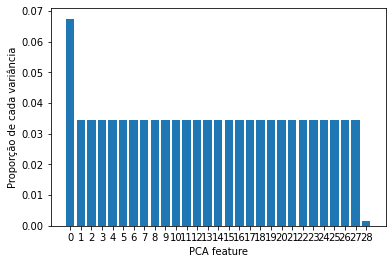

In [8]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Proporção de cada variância')
plt.xticks(features)
plt.show()

In [9]:
model = PCA(1)

X = model.fit_transform(X)

In [10]:
X = pd.DataFrame(X)
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [14]:
def deriv_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

Para calcular o gradiente de cada parâmetro, basta utilizar a regra da cadeia.

Sabendo que $\frac{\partial J}{\partial W2} = \frac{\partial J}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial W2}$

Eu sei que para a calcular o gradiente de $W1$, basta aproveitar todo o resultado acima.

A derivada do custo em relação ao y_pred: 
$$\frac{\partial J}{\partial y_{pred}} = 2(y_{pred} - y)*(1)$$

A derivada do y_pred em relação ao W2:
$$\frac{\partial y_{pred}}{\partial W_2} = [\sigma(W2*a0 + b2)]´ = 
\sigma´(W2*a0 + b2)*a0
$$

Logo, 
$$\frac{\partial J}{\partial W_2} = 
\frac{\partial J}{\partial y_{pred}}
\frac{\partial y_{pred}}{\partial W_2}
$$

Já para $\frac{\partial J}{\partial W_1}$, temos a seguinte relação:

$$
\frac{\partial J}{\partial W_1} = 
\frac{\partial J}{\partial y_{pred}}
\frac{\partial y_{pred}}{\partial a_0}
\frac{\partial a_0}{\partial W_1}
$$

Com isso, 
$$
\frac{\partial y_{pred}}{\partial a_0} = 
[\sigma(W2*a0 + b2)]´ = 
\sigma´(W2*a0 + b2)W_2
$$

E, 
$$
\frac{\partial a_0}{\partial W_1} = 
[\sigma(W1*X + b1)]´ = 
\sigma´(W1*X + b1)X
$$

Agora calculando as bias:

$$
\frac{\partial J}{\partial b_1} = 
\frac{\partial J}{\partial y_{pred}}
\frac{\partial y_{pred}}{\partial a_0}  
\frac{\partial a_0}{\partial b_1}
$$

$$
\frac{\partial y_{pred}}{\partial a_0} = 
[\sigma(a_0)]´ = 
\sigma´(a_0)W_2
$$

$$
\frac{\partial a_0}{\partial b_1} = 
[\sigma(W1*X + b1)]´ = 
\sigma´(W1*X + b1)
$$

In [52]:
def feedfoward(X_train, y_train, W1, W2, b1, b2):

  a0 = np.multiply(X_train, W1.T) + b1
  z0 = sigmoid(a0)

  y_pred = sigmoid(np.multiply(z0, W2.T) + b2)

  y_pred = (y_pred > 0.5)*1

  return y_pred


In [53]:
def backpropagation(X_train, y_train, W1, W2, b1, b2):

  X_train = np.array(X_train)

  a0 = np.multiply(X_train, W1.T) + b1
  z0 = sigmoid(a0)

  y_pred = sigmoid(np.multiply(z0, W2.T) + b2)

  y_pred  = np.array((y_pred > 0.5)*1)
  y_train = np.array(y_train).reshape(-1,1)


  custo = np.sum(((y_pred - y_train)**2))/len(y_pred)

  grad_cost_ypred = (2*(y_pred - y_train))/len(y_pred)

  
  grad_ypred_W2 = deriv_sigmoid(np.multiply(a0, W2.T) + b2)
  grad_ypred_W2 = np.multiply(a0, grad_ypred_W2)

  #logo, derivado do custo por W2 é igual a:
  grad_cost_W2 = np.dot(grad_cost_ypred.T, grad_ypred_W2)


  # #derivando o y_pred pelo a0
  grad_ypred_a0 = deriv_sigmoid(np.multiply(a0, W2.T) + b2)
  grad_ypred_a0 = np.multiply(W2, grad_ypred_a0)

  #derivando o a0 pelo W1
  grad_a0_W1 = deriv_sigmoid(np.multiply(W1, X_train) + b1)
  grad_a0_W1 = np.multiply(W1, grad_a0_W1)

  #logo, derivada do custo por W1 é igual a:
  grad_cost_W1 = np.multiply(grad_cost_ypred, grad_ypred_a0)
  grad_cost_W1 = np.dot(grad_a0_W1.T, grad_a0_W1)

  # #derivando o y_pred pelo b2
  grad_ypred_b2 = deriv_sigmoid(np.multiply(a0, W2.T) + b2)

  #logo, derivado do custo por b2 é igual a:
  grad_cost_b2 = np.sum(np.multiply(grad_cost_ypred, grad_ypred_b2))

  #derivando o a0 pelo b1
  grad_a0_b1 = deriv_sigmoid(np.multiply(X_train, W1.T) + b1)

  #derivando custo pelo b1    
  grad_cost_b1 = np.multiply(grad_cost_ypred, grad_ypred_a0)
  grad_cost_b1 = np.dot(grad_cost_b1.T, np.multiply(X_train, W1.T) + b1)

  
  return custo, grad_cost_W1, grad_cost_W2, grad_cost_b1, grad_cost_b2


In [54]:
def predict(X_train, X_test, y_train, y_test,learn_rate=0.01, iter=20):
  np.random.seed(123)

  W1 = np.random.rand(1)
  W2 = np.random.rand(1)
  b1 = np.random.rand(1)
  b2 = np.random.rand(1)

  X_train = X_train.to_numpy()
  y_train = y_train.to_numpy()

  n = X_train.shape[0]

  custo_total = []

  for i in range(iter):
    
    J, W1_grad, W2_grad, b1_grad, b2_grad = backpropagation(X_train,y_train, W1, W2, b1, b2)

    W1 = W1 - learn_rate*W1_grad
    W2 = W2 - learn_rate*W2_grad
    b1 = b1 - learn_rate*b1_grad
    b2 = b2 - learn_rate*b2_grad

    custo_total.append(J)

  y_pred = feedfoward(X_test,y_test, W1, W2, b1, b2)

  return y_pred, custo_total



In [56]:
y_pred, custo = predict(X_train, X_test,  y_train, y_test,learn_rate=0.0001,iter=20)
y_pred

,0
43428,0.670916
49906,0.671514
29474,0.670215
276481,0.670077
278846,0.670134
...,...
180795,0.670166
259979,0.670138
21885,0.670662
217812,0.670136


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [50]:
conf_matrix = confusion_matrix(y_pred, y_test)

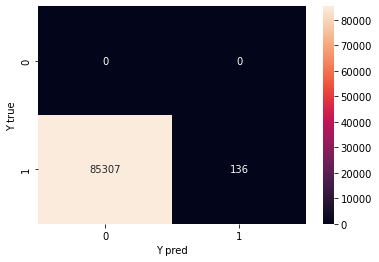

In [51]:
ax = sns.heatmap(conf_matrix, annot=True,  fmt='g')
ax.set(xlabel='Y pred', ylabel='Y true')
plt.show()